In [1]:
import pydeck as pdk
import pandas as pd
import geopandas as gpd
import contextily as cx
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from moviepy.editor import VideoClip, concatenate_videoclips

In [2]:
df_chinaports = pd.read_csv('C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/China Overseas Ports Final_VictorCLEANED.csv')
df_UsMilitary2015 = pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/US bases 2015.csv", encoding='latin1')
COUNTRIES = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_scale_rank.geojson"

In [3]:
df_chinaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    72 non-null     object 
 1   Country                 72 non-null     object 
 2   AGENDA FOR NAVAL USE    72 non-null     object 
 3   SHARE OWNERSHIP         72 non-null     object 
 4   INV (in M$)             73 non-null     object 
 5   INV. TYPE               72 non-null     object 
 6   CONST. START            72 non-null     float64
 7   CONST. END              43 non-null     float64
 8   Cooperative enterprise  72 non-null     object 
 9   Latitude                72 non-null     float64
 10  Longitude               72 non-null     float64
dtypes: float64(4), object(7)
memory usage: 6.4+ KB


In [4]:
# Convert 'CONST. START' column to Int64 data type
df_chinaports['CONST. START'] = df_chinaports['CONST. START'].astype('Int64')
df_chinaports["INV (in M$)"] = pd.to_numeric(df_chinaports["INV (in M$)"], errors='coerce')
df_chinaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    72 non-null     object 
 1   Country                 72 non-null     object 
 2   AGENDA FOR NAVAL USE    72 non-null     object 
 3   SHARE OWNERSHIP         72 non-null     object 
 4   INV (in M$)             60 non-null     float64
 5   INV. TYPE               72 non-null     object 
 6   CONST. START            72 non-null     Int64  
 7   CONST. END              43 non-null     float64
 8   Cooperative enterprise  72 non-null     object 
 9   Latitude                72 non-null     float64
 10  Longitude               72 non-null     float64
dtypes: Int64(1), float64(4), object(6)
memory usage: 6.5+ KB


In [5]:
# Convert "INV (in M$)" column to numeric values
df_chinaports["INV (in M$)"] = pd.to_numeric(df_chinaports["INV (in M$)"], errors="coerce")

# Define the color_point function
def color_point(inv):
    """Return a red RGB value if the investment is made in China"""
    if inv > 0:
        return [230, 10, 10]  # Red color for Chinese investments
    else:
        return [0, 0, 255]  # Blue color for USA investments

# Apply the color_point function to create a color column based on investment in M$
df_chinaports["color"] = df_chinaports["INV (in M$)"].apply(color_point)

# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)

layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ScatterplotLayer",
        id="chinaports",
        data=df_chinaports,
        get_position=["LONGITUDE", "LATITUDE"],
        get_radius=5000,
        get_fill_color="color",
        auto_highlight=True,
        pickable=True,
    ),
    pdk.Layer(
        "ScatterplotLayer",
        id="UsMilitary2015",
        data=df_UsMilitary2015,
        get_position=["longitude", "latitude"],
        get_radius=5000,
        get_fill_color=[0, 0, 255],  # Blue color for USA points
        auto_highlight=True,
        pickable=True,
    ),
#     pdk.Layer(
#         "ColumnLayer",
#         id="power-plant",
#         data=df_chinaports,
#         get_elevation="INV (in M$)",
#         get_position=["longitude", "latitude"],
#         elevation_scale=100,
#         pickable=True,
#         auto_highlight=True,
#         radius=20000,
#         get_fill_color="red",
#     )
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)


# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="black")

In [6]:
df_chinaports.head()

,PORT,Country,AGENDA FOR NAVAL USE,SHARE OWNERSHIP,INV (in M$),INV. TYPE,CONST. START,CONST. END,Cooperative enterprise,Latitude,Longitude,color
0,Riga Port Coal Terminal Project,Latvia,Yes,"0,00%",110.0,Joint Venture,2016,2018.0,China Harbour,56.946285,24.105078,"[230, 10, 10]"
1,Hamburg Port Container Terminal Tollerot Aquis...,Germany,No,"24,99%",76.0,Acquisition,2022,NaN,COSCO Shipping,53.548800,9.987200,"[230, 10, 10]"
2,Rotterdam EUROMAX Container Acquisition,The Netherlands,Yes,"35,00%",140.0,Acquisition,2016,NaN,COSCO Shipping,51.924400,4.477700,"[230, 10, 10]"
3,Zeenbrugge Container Terminal Acquisition,Belgium,No,"100,00%",39.0,Acquisition,2017,NaN,COSCO Shipping,51.209200,3.224800,"[230, 10, 10]"
4,Marseille Port of Fos Eurofos Terminal Link Ac...,France,Unclear,"49,00%",450.0,Joint Venture,2013,NaN,China Merchants International,43.296500,5.369800,"[230, 10, 10]"


# PLOTTING THE 3D GLOBE

In [7]:
# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)

layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)


# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="black")

## PLOTTING THE CHINESE PORTS POINTS

In [8]:
df_chinaports = pd.read_excel('C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/China Overseas Ports Final_VictorCLEANED.xlsx')

# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=900, height=700)

layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ScatterplotLayer",
        id="china",
        data=df_chinaports,
        get_position=["Longitude", "Latitude"],
        get_radius=75000,  # Adjust as needed
        get_color=[255, 0, 0],  # Red color for the points
        pickable=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)


# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="white")

### CREATING AND EXPORTING AN ANIMATION OF THE GLOBE

MovieWriter imagemagick unavailable; using Pillow instead.


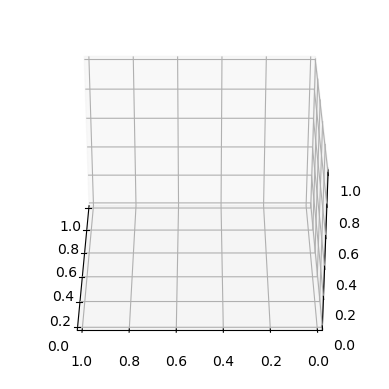

In [9]:
# Define the update function for the animation
def update(frame):
    ax.view_init(azim=frame)  # Set the azimuth angle for the view
    return fig,

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set your existing view parameters
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)

# Define layers
layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ScatterplotLayer",
        id="china",
        data=df_chinaports,
        get_position=["Longitude", "Latitude"],
        get_radius=75000,
        get_color=[255, 0, 0],
        pickable=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    parameters={"cull": True},
)

# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="black")

# Create the animation
ani = FuncAnimation(fig, update, frames=range(-180, 181, 1), interval=50, repeat=False)

# Save the animation as a GIF
ani.save('earth_rotation.gif', writer='imagemagick', fps=30)


## PLOTTING THE US MILITARY BASES_2015

In [9]:
# US MILITARY BASES
# Read the CSV file with a different encoding
df_UsMilitary2015 = pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/US bases 2015.csv", encoding='latin1')

# Check the information about the DataFrame
df_UsMilitary2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country/Colony Name              402 non-null    object 
 1   Base Name/Location               398 non-null    object 
 2   Latitude                         401 non-null    float64
 3   Longitude                        401 non-null    float64
 4   # Bases                          57 non-null     object 
 5   # Lily Pads/Small Bases          68 non-null     float64
 6   # U.S. Funded Host Nation Bases  17 non-null     float64
 7   Notes                            108 non-null    object 
dtypes: float64(4), object(4)
memory usage: 40.9+ KB


In [10]:
# Read the CSV file with a different encoding
df_UsMilitary2015 = pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/US bases 2015.csv", encoding='latin1')

# Check the information about the DataFrame
df_UsMilitary2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country/Colony Name              402 non-null    object 
 1   Base Name/Location               398 non-null    object 
 2   Latitude                         401 non-null    float64
 3   Longitude                        401 non-null    float64
 4   # Bases                          57 non-null     object 
 5   # Lily Pads/Small Bases          68 non-null     float64
 6   # U.S. Funded Host Nation Bases  17 non-null     float64
 7   Notes                            108 non-null    object 
dtypes: float64(4), object(4)
memory usage: 40.9+ KB


In [11]:
df_UsMilitary2015 = pd.read_csv('C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/US bases 2015.csv', encoding='latin1')

# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)

layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ScatterplotLayer",
        id="US2015",
        data=df_UsMilitary2015,
        get_position=["Longitude", "Latitude"],
        get_radius=75000,  # Adjust as needed
        get_color=[0, 0, 128],  # Blue color for the points
        pickable=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)


# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="white")

## Projecting the Chinese Ports based on Investment

In [12]:
print(df_chinaports['INV (in M$)'].dtype)

object


In [13]:
# Convert 'INV (in M$)' & 'scaled_investment' column to Int64 data type
df_chinaports["INV (in M$)"] = pd.to_numeric(df_chinaports["INV (in M$)"], errors='coerce')

In [14]:
# Create the scaled_investment column and update its values
df_chinaports['scaled_investment'] = df_chinaports['INV (in M$)'] * 1000  # Multiply by 0.1


# Verify the updated column
print(df_chinaports['scaled_investment'])

0     10000000.0
1      7300000.0
2      2600000.0
3      1500000.0
4      1300000.0
         ...    
68       28000.0
69       18000.0
70       15000.0
71       10000.0
72           NaN
Name: scaled_investment, Length: 73, dtype: float64


In [15]:
df_chinaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    72 non-null     object 
 1   Country                 72 non-null     object 
 2   AGENDA FOR NAVAL USE    72 non-null     object 
 3   SHARE OWNERSHIP         72 non-null     object 
 4   INV (in M$)             72 non-null     float64
 5   INV. TYPE               72 non-null     object 
 6   CONST. START            72 non-null     float64
 7   CONST. END              43 non-null     float64
 8   Cooperative enterprise  72 non-null     object 
 9   Latitude                72 non-null     float64
 10  Longitude               72 non-null     float64
 11  scaled_investment       72 non-null     float64
dtypes: float64(6), object(6)
memory usage: 7.0+ KB


In [16]:
df_chinaports.head(20)

,PORT,Country,AGENDA FOR NAVAL USE,SHARE OWNERSHIP,INV (in M$),INV. TYPE,CONST. START,CONST. END,Cooperative enterprise,Latitude,Longitude,scaled_investment
0,Bagamoyo Port Project,Tanzania,Yes,"0,00%",10000.0,Greenfield,2018.0,NaN,China Merchants Group,-6.445634,38.898941,10000000.0
1,Melbourne Port 50-Year Lease,Australia,Yes,"0,00%",7300.0,Joint Venture,2016.0,NaN,China Soverign Wealth Fund CIC,-37.813600,144.963100,7300000.0
2,Singapore Pasir Panjang New Berth Project,Singapore,No,"49,00%",2600.0,Joint Venture,2017.0,2018.0,China Ocean Shipping,1.281140,103.784514,2600000.0
3,Lekki Deepwater Port Phase 1 Project,Nigeria,Yes,"52,50%",1500.0,Joint Venture,2018.0,2022.0,China Harbour,6.426700,4.006100,1500000.0
4,Hambantota Port Project,Sri Lanka,Yes,"70,00%",1300.0,Joint Venture,2008.0,2016.0,China Harbour,6.119988,81.104593,1300000.0
5,Kyauk Pyu Port Project,Myanmar,Yes,"70,00%",1300.0,Joint Venture,2023.0,NaN,CITIC Consortium,19.421203,93.545849,1300000.0
6,Lobito Port Expansion Project,Angola,Yes,"0,00%",1200.0,Joint Venture,2008.0,2013.0,China Harbour,-12.347700,13.547300,1200000.0
7,Korea Express Busan Container Terminal (KBCT) ...,South Korea,Unclear,"20,00%",1200.0,Acquisition,2015.0,NaN,Zhonghai Port,35.210014,129.068870,1200000.0
8,Tamatave Deepwater Port Project,Madagascar,Yes,"0,00%",1000.0,Turnkey,2015.0,NaN,China Comunication Construction Company Ltd.,-18.144281,49.395784,1000000.0
9,Ashdod South Port Construction Project,Israel,Yes,"0,00%",1000.0,Turnkey,2014.0,NaN,Shanghai International Port (Group) Company Li...,31.804381,34.655314,1000000.0


In [17]:
df_chinaports['INV (in M$)'] = df_chinaports['INV (in M$)'].astype('Int64')

In [18]:
df_chinaports['scaled_investment'] = df_chinaports['scaled_investment'].astype('Int64')

In [19]:
df_chinaports['INV (in M$)'].fillna(0, inplace=True)
df_chinaports['scaled_investment'].fillna(1, inplace=True)

In [20]:
df_chinaports['INV (in M$)'].describe()

count           73.0
mean      631.219178
std      1448.379547
min              0.0
25%             76.0
50%            230.0
75%            570.0
max          10000.0
Name: INV (in M$), dtype: Float64

In [21]:
df_chinaports["AGENDA FOR NAVAL USE"] = df_chinaports["AGENDA FOR NAVAL USE"].astype(str)
df_chinaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    72 non-null     object 
 1   Country                 72 non-null     object 
 2   AGENDA FOR NAVAL USE    73 non-null     object 
 3   SHARE OWNERSHIP         72 non-null     object 
 4   INV (in M$)             73 non-null     Int64  
 5   INV. TYPE               72 non-null     object 
 6   CONST. START            72 non-null     float64
 7   CONST. END              43 non-null     float64
 8   Cooperative enterprise  72 non-null     object 
 9   Latitude                72 non-null     float64
 10  Longitude               72 non-null     float64
 11  scaled_investment       73 non-null     Int64  
dtypes: Int64(2), float64(4), object(6)
memory usage: 7.1+ KB


In [22]:
naval_use_counts = df_chinaports["AGENDA FOR NAVAL USE"].value_counts()
print(naval_use_counts)

Yes        52
Unclear    14
No          6
nan         1
Name: AGENDA FOR NAVAL USE, dtype: int64


In [38]:
view_state = pdk.ViewState(latitude=51.47, longitude=0.45, zoom=1, min_zoom=1)

def is_naval(naval_type):
    """Return a green RGB value if a facility has naval capacity"""
    if naval_type.lower() == "Yes":
        return [10, 230, 120]
    
df_chinaports["color"] = df_chinaports["AGENDA FOR NAVAL USE"].apply(is_naval)

layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ColumnLayer",
        id="china",
        data=df_chinaports[df_chinaports["AGENDA FOR NAVAL USE"]=='Yes'],
        get_position=["Longitude", "Latitude"],
        get_elevation="scaled_investment",  # Use the 'scaled_investment' column for elevation
        elevation_scale=1,  # Adjust scale as needed
        get_fill_color=[10, 230, 120],  # Red color for the columns
        radius=75000,  # Adjust as needed
        pickable=True,
    ),
    pdk.Layer(
        "ColumnLayer",
        id="china",
        data=df_chinaports[df_chinaports["AGENDA FOR NAVAL USE"]!='Yes'],
        get_position=["Longitude", "Latitude"],
        get_elevation="scaled_investment",  # Use the 'scaled_investment' column for elevation
        elevation_scale=1,  # Adjust scale as needed
        get_fill_color=[255, 0, 0],  # Red color for the columns
        radius=75000,  # Adjust as needed
        pickable=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    parameters={"cull": True},
)

# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="purple")



In [34]:
view_state = pdk.ViewState(latitude=51.47, longitude=0.45, zoom=5, min_zoom=2)

def is_naval(naval_type):
    """Return a green RGB value if a facility has naval capacity"""
    if naval_type.lower() == "Yes":
        return [10, 230, 120]
    
df_chinaports["color"] = df_chinaports["AGENDA FOR NAVAL USE"].apply(is_naval)

layers = [
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    pdk.Layer(
        "ColumnLayer",
        id="china",
        data=df_chinaports[df_chinaports["AGENDA FOR NAVAL USE"]=='Yes'],
        get_position=["Longitude", "Latitude"],
        get_elevation="scaled_investment",  # Use the 'scaled_investment' column for elevation
        elevation_scale=1,  # Adjust scale as needed
        get_fill_color=[10, 230, 120],  # Red color for the columns
        radius=75000,  # Adjust as needed
        pickable=True,
    ),
    pdk.Layer(
        "ColumnLayer",
        id="china",
        data=df_chinaports[df_chinaports["AGENDA FOR NAVAL USE"]!='Yes'],
        get_position=["Longitude", "Latitude"],
        get_elevation="scaled_investment",  # Use the 'scaled_investment' column for elevation
        elevation_scale=1,  # Adjust scale as needed
        get_fill_color=[255, 0, 0],  # Red color for the columns
        radius=75000,  # Adjust as needed
        pickable=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    parameters={"cull": True},
)

# Export the deck to HTML
deck.to_html("globe_view.html", css_background_color="purple")

# Generate frames for the animation
frames = []
for angle in np.linspace(0, 360, 60):  # 60 frames for a full rotation
    view_state = pdk.ViewState(latitude=51.47, longitude=0.45, zoom=2, pitch=0, bearing=angle)
    deck = pdk.Deck(
        layers=layers,
        initial_view_state=view_state,
        map_style=None
    )
    r = deck.show()
    filename = f"frame_{int(angle):03d}.png"
    r.to_html("temp.html")
    r.screenshot("temp.html", filename=filename)
    frames.append(imageio.imread(filename))

# Create a video from the frames
clip = ImageSequenceClip(frames, fps=20)
clip.write_videofile("globe_rotation.mov", codec="mpeg4")

# Clean up temporary files
import os
for filename in frames:
    os.remove(filename)

NameError: name 'np' is not defined

## Plotting Chinese Investment per Country

### Install GeoPy_ For finding lat,long cordinates of places

In [24]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [24]:
#Test to see if it retrieves country coordinates
geolocator = Nominatim(user_agent="ChinaFDI")
location = geolocator.geocode("Indonesia")
print((location.latitude, location.longitude))

(-2.4833826, 117.8902853)


In [25]:
df_Chinainvestment2023 = pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/China-Global-Investment-Tracker-2023-Fall_test.csv", encoding='latin1')
print(df_Chinainvestment2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2154 non-null   int64  
 1   Month                   2154 non-null   object 
 2   Investor                2154 non-null   object 
 3    Quantity in Millions   2154 non-null   object 
 4   Share Size              1286 non-null   object 
 5   Transaction Party       1419 non-null   object 
 6   Sector                  2154 non-null   object 
 7   Subsector               1362 non-null   object 
 8   Country                 2154 non-null   object 
 9   Region                  2154 non-null   object 
 10  BRI                     1608 non-null   float64
 11  Greenfield              734 non-null    object 
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 non-null      

In [26]:
df_Chinainvestment2023=df_Chinainvestment2023.drop(['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'], axis=1)
print(df_Chinainvestment2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2154 non-null   int64  
 1   Month                   2154 non-null   object 
 2   Investor                2154 non-null   object 
 3    Quantity in Millions   2154 non-null   object 
 4   Share Size              1286 non-null   object 
 5   Transaction Party       1419 non-null   object 
 6   Sector                  2154 non-null   object 
 7   Subsector               1362 non-null   object 
 8   Country                 2154 non-null   object 
 9   Region                  2154 non-null   object 
 10  BRI                     1608 non-null   float64
 11  Greenfield              734 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 202.1+ KB
None


In [27]:
import time

In [29]:
# Initialize geolocator
geolocator = Nominatim(user_agent="ChinaFDI")

def get_coordinates(country_name):
    try:
        location = geolocator.geocode(country_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

In [30]:
countries = df_Chinainvestment2023[['Country']].drop_duplicates()

In [31]:
countries['geolocate'] = countries['Country'].apply(get_coordinates)

In [31]:
countries[countries['geolocate']==(None,None)]

,Country,geolocate


In [32]:
countries['lat'] = countries['geolocate'].apply(lambda x: x[0])
countries['lon'] = countries['geolocate'].apply(lambda x: x[1])

In [76]:
# Verify the changes
print(countries[countries['Country'] == 'Mali'])

     Country                 geolocate        lat       lon
2028    Mali  (16.3700359, -2.2900239)  16.370036 -2.290024


## Merging ChinaFDI Investment_Df w/ Countries_Df

In [33]:
# Assuming 'countries' contains country information and 'df_Chinainvestment2023' contains investment data
FinalChinaInvestment_df = pd.merge(df_Chinainvestment2023, countries, how='left', on='Country')

cols=[]
for col in FinalChinaInvestment_df.columns:
    cols.append(col.strip())
    
FinalChinaInvestment_df.columns = cols

# Print the information about the merged DataFrame
print(FinalChinaInvestment_df.columns)

Index(['Year', 'Month', 'Investor', 'Quantity in Millions', 'Share Size',
       'Transaction Party', 'Sector', 'Subsector', 'Country', 'Region', 'BRI',
       'Greenfield', 'geolocate', 'lat', 'lon'],
      dtype='object')


## Calculating Cumulative Chinese Investment into Each Country

In [34]:
FinalChinaInvestment_df.head()

,Year,Month,Investor,Quantity in Millions,Share Size,Transaction Party,Sector,Subsector,Country,Region,BRI,Greenfield,geolocate,lat,lon
0,2005,January,Minmetals,$500,NaN,Cubapetroleo,Metals,NaN,Cuba,North America,NaN,G,"(23.0131338, -80.8328748)",23.013134,-80.832875
1,2005,January,Chinese Academy of Sciences,"$1,740",NaN,IBM,Technology,NaN,USA,USA,NaN,NaN,"(39.7837304, -100.445882)",39.783730,-100.445882
2,2005,March,MCC,$670,85%,Highlands Pacific,Metals,Steel,Papua New Guinea,East Asia,NaN,G,"(-5.6816069, 144.2489081)",-5.681607,144.248908
3,2005,April,China National Off-shore Oil (CNOOC),$130,17%,MEG Energy,Energy,Oil,Canada,North America,NaN,NaN,"(61.0666922, -107.991707)",61.066692,-107.991707
4,2005,June,China Petroleum and Chemical (Sinopec),$120,40%,Synenco,Energy,Oil,Canada,North America,NaN,G,"(61.0666922, -107.991707)",61.066692,-107.991707


In [37]:
FinalChinaInvestment_df['Quantity in Millions'] = FinalChinaInvestment_df['Quantity in Millions'].str.replace('$','').str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [36]:
# Group by Counntry and $Amt invested in the Country
chinainvest_percountry = FinalChinaInvestment_df.groupby("Country")['Quantity in Millions'].sum()
print(chinainvest_percountry).sum

Country
Afghanistan             3070
Algeria                  430
Angola                  5150
Antigua and Barbuda      740
Argentina              12770
                       ...  
Venezuela               4570
Vietnam                10400
Yemen                    470
Zambia                  3770
Zimbabwe                4110
Name: Quantity in Millions, Length: 134, dtype: int32


AttributeError: 'NoneType' object has no attribute 'sum'

In [38]:
# Convert 'Quantity in Millions' column to Int64 data type
FinalChinaInvestment_df["Quantity in Millions"] = FinalChinaInvestment_df["Quantity in Millions"].astype(int)
FinalChinaInvestment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2153
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2154 non-null   int64  
 1   Month                 2154 non-null   object 
 2   Investor              2154 non-null   object 
 3   Quantity in Millions  2154 non-null   int32  
 4   Share Size            1286 non-null   object 
 5   Transaction Party     1419 non-null   object 
 6   Sector                2154 non-null   object 
 7   Subsector             1362 non-null   object 
 8   Country               2154 non-null   object 
 9   Region                2154 non-null   object 
 10  BRI                   1608 non-null   float64
 11  Greenfield            734 non-null    object 
 12  geolocate             2154 non-null   object 
 13  lat                   2154 non-null   float64
 14  lon                   2154 non-null   float64
dtypes: float64(3), int32(

In [39]:
# Group by Counntry and $Amt invested in the Country
df_chinainvest_percountry = FinalChinaInvestment_df.groupby("Country").agg({'Quantity in Millions':'sum'})

# Compute cumulative sum for each country
df_chinainvest_percountry

,Quantity in Millions
Country,
Afghanistan,3070
Algeria,430
Angola,5150
Antigua and Barbuda,740
Argentina,12770
...,...
Venezuela,4570
Vietnam,10400
Yemen,470


In [40]:
# Assuming 'countries' contains country information and 'df_Chinainvestment2023' contains investment data
df_chinainvest_percountry_TOTAL = pd.merge(df_chinainvest_percountry, countries, how='left', on='Country')

# Print the information about the merged DataFrame
print(df_chinainvest_percountry_TOTAL.columns)

Index(['Country', 'Quantity in Millions', 'geolocate', 'lat', 'lon'], dtype='object')


In [41]:
df_chinainvest_percountry_TOTAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               134 non-null    object 
 1   Quantity in Millions  134 non-null    int32  
 2   geolocate             134 non-null    object 
 3   lat                   134 non-null    float64
 4   lon                   134 non-null    float64
dtypes: float64(2), int32(1), object(2)
memory usage: 5.8+ KB


In [42]:
FinalChinaInvestment_df.groupby("Country")['Quantity in Millions'].sum()

Country
Afghanistan             3070
Algeria                  430
Angola                  5150
Antigua and Barbuda      740
Argentina              12770
                       ...  
Venezuela               4570
Vietnam                10400
Yemen                    470
Zambia                  3770
Zimbabwe                4110
Name: Quantity in Millions, Length: 134, dtype: int32

In [42]:
df_Chinainvestment2023.head()

,Year,Month,Investor,Quantity in Millions,Share Size,Transaction Party,Sector,Subsector,Country,Region,BRI,Greenfield
0,2005,January,Minmetals,$500,NaN,Cubapetroleo,Metals,NaN,Cuba,North America,NaN,G
1,2005,January,Chinese Academy of Sciences,"$1,740",NaN,IBM,Technology,NaN,USA,USA,NaN,NaN
2,2005,March,MCC,$670,85%,Highlands Pacific,Metals,Steel,Papua New Guinea,East Asia,NaN,G
3,2005,April,China National Off-shore Oil (CNOOC),$130,17%,MEG Energy,Energy,Oil,Canada,North America,NaN,NaN
4,2005,June,China Petroleum and Chemical (Sinopec),$120,40%,Synenco,Energy,Oil,Canada,North America,NaN,G


In [43]:
unique_regions = df_Chinainvestment2023['Region'].unique()
print(unique_regions)

['North America' 'USA' 'East Asia' 'Europe' 'West Asia' 'South America'
 'Australia' 'Arab Middle East and North Africa' 'Sub-Saharan Africa']


In [44]:
# Extracting 'Country' and 'Region' columns into a new separate DataFrame
country_region_df = df_Chinainvestment2023[['Country', 'Region']]

# Display the new DataFrame
print(country_region_df.head())


            Country         Region
0              Cuba  North America
1               USA            USA
2  Papua New Guinea      East Asia
3            Canada  North America
4            Canada  North America


In [45]:
# Extracting 'Country' and 'Region' columns into a new separate DataFrame
country_millions_df = df_chinainvest_percountry_TOTAL[['Country', 'Quantity in Millions']]

# Display the new DataFrame
print(country_millions_df.head())


               Country  Quantity in Millions
0          Afghanistan                  3070
1              Algeria                   430
2               Angola                  5150
3  Antigua and Barbuda                   740
4            Argentina                 12770


### MERGE THESE TWO NEW DATA FRAMES

#### Why? This is so that we can assign a geocode (lat,long) to the regions separately.

In [46]:
# MERGING THE 2 DATAFRAMES_
df_millions_region = pd.merge(country_region_df, country_millions_df, how='left', on='Country')

# Print the information about the merged DataFrame
print(df_millions_region.columns)

Index(['Country', 'Region', 'Quantity in Millions'], dtype='object')


In [47]:
df_millions_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2153
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               2154 non-null   object
 1   Region                2154 non-null   object
 2   Quantity in Millions  2154 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 58.9+ KB


In [48]:
# Group by Region and $Amt invested in the Country
chinainvest_perregion = df_millions_region.groupby("Region")['Quantity in Millions'].sum()
print(chinainvest_perregion).sum

Region
Arab Middle East and North Africa      539120
Australia                            19062000
East Asia                             9887500
Europe                               23244960
North America                         4452190
South America                         7093970
Sub-Saharan Africa                    1120920
USA                                  59188020
West Asia                             3840590
Name: Quantity in Millions, dtype: int32


AttributeError: 'NoneType' object has no attribute 'sum'

In [49]:
df_region_coordinates = pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/ChinaInv_Reg-Cooredinates.csv")
df_region_coordinates.head()

,Region,lat,lon
0,North America,61.07,-107.99
1,USA,38.00,-97.00
2,East Asia,35.00,104.00
3,Europe,51.00,9.00
4,West Asia,35.00,38.00


In [50]:
# MERGING THE 2 DATAFRAMES_
df_millions_region_coordinates = pd.merge(df_millions_region, df_region_coordinates, how='left', on='Region')

# Print the information about the merged DataFrame
print(df_millions_region_coordinates.columns)

Index(['Country', 'Region', 'Quantity in Millions', 'lat', 'lon'], dtype='object')


In [51]:
df_millions_region_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2153
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2154 non-null   object 
 1   Region                2154 non-null   object 
 2   Quantity in Millions  2154 non-null   int32  
 3   lat                   2154 non-null   float64
 4   lon                   2154 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 92.6+ KB


In [52]:
# Group by Counntry and $Amt invested in the Country
df_cuminvest_region = df_millions_region_coordinates.groupby("Region").agg({'Quantity in Millions':'sum'})

# Compute cumulative sum for each country
df_cuminvest_region

#THIS IS A NEW DATAFRAME

,Quantity in Millions
Region,
Arab Middle East and North Africa,539120
Australia,19062000
East Asia,9887500
Europe,23244960
North America,4452190
South America,7093970
Sub-Saharan Africa,1120920
USA,59188020
West Asia,3840590


In [79]:
#THIS IS NOT A DATAFRAME
chinainvest_perregion

<class 'pandas.core.series.Series'>
Index: 9 entries, Arab Middle East and North Africa to West Asia
Series name: Quantity in Millions
Non-Null Count  Dtype
--------------  -----
9 non-null      int32
dtypes: int32(1)
memory usage: 408.0+ bytes


In [53]:
# MERGING THE 2 DATAFRAMES_
df_CUM_invest_region_coordinates = pd.merge(df_cuminvest_region, df_region_coordinates, how='left', on='Region')

# Print the information about the merged DataFrame
print(df_CUM_invest_region_coordinates.columns)

Index(['Region', 'Quantity in Millions', 'lat', 'lon'], dtype='object')


In [54]:
df_CUM_invest_region_coordinates.head()

,Region,Quantity in Millions,lat,lon
0,Arab Middle East and North Africa,539120,25.62,42.35
1,Australia,19062000,-24.78,134.76
2,East Asia,9887500,35.00,104.00
3,Europe,23244960,51.00,9.00
4,North America,4452190,61.07,-107.99


In [55]:
#Test to see if it retrieves  coordinates
geolocator = Nominatim(user_agent="ChinaFDI")
location = geolocator.geocode("Canada")
print((location.latitude, location.longitude))

(61.0666922, -107.991707)


# PLOTTING 2D MAPS (PyDeck_GretaCircleLayer)

In [56]:
# Create new columns for 'from' coordinates with the latitude and longitude of Beijing, China
df_CUM_invest_region_coordinates["from_lat"] = 39.9042  # Latitude of Beijing, China
df_CUM_invest_region_coordinates["from_lon"] = 116.4074  # Longitude of Beijing, China

# Rename columns to match the expected column names in the GreatCircleLayer
df_CUM_invest_region_coordinates = df_CUM_invest_region_coordinates.rename(columns={"Region": "to_name", "lat": "to_lat", "lon": "to_lon"})

df_CUM_invest_region_coordinates.head()

,to_name,Quantity in Millions,to_lat,to_lon,from_lat,from_lon
0,Arab Middle East and North Africa,539120,25.62,42.35,39.9042,116.4074
1,Australia,19062000,-24.78,134.76,39.9042,116.4074
2,East Asia,9887500,35.00,104.00,39.9042,116.4074
3,Europe,23244960,51.00,9.00,39.9042,116.4074
4,North America,4452190,61.07,-107.99,39.9042,116.4074


In [57]:
df_CUM_invest_region_coordinates

,to_name,Quantity in Millions,to_lat,to_lon,from_lat,from_lon
0,Arab Middle East and North Africa,539120,25.62,42.35,39.9042,116.4074
1,Australia,19062000,-24.78,134.76,39.9042,116.4074
2,East Asia,9887500,35.00,104.00,39.9042,116.4074
3,Europe,23244960,51.00,9.00,39.9042,116.4074
4,North America,4452190,61.07,-107.99,39.9042,116.4074
5,South America,7093970,-10.33,-53.20,39.9042,116.4074
6,Sub-Saharan Africa,1120920,15.61,19.02,39.9042,116.4074
7,USA,59188020,38.00,-97.00,39.9042,116.4074
8,West Asia,3840590,35.00,38.00,39.9042,116.4074


In [58]:
# Define a layer to display on a map
layer = pdk.Layer(
    "GreatCircleLayer",
    df_CUM_invest_region_coordinates,
    pickable=True,
    get_stroke_width=120,
    get_source_position=["from_lon", "from_lat"],  # "from" coordinates
    get_target_position=["to_lon", "to_lat"],  # "to" coordinates
    get_source_color=[64, 255, 0],
    get_target_color=[0, 128, 200],
    auto_highlight=True,
)

# Set the viewport location
view_state = pdk.ViewState(latitude=50, longitude=-40, zoom=1, bearing=0, pitch=0)

# Render
r = pdk.Deck(
    layers=[layer],
    initial_view_state=view_state,
    tooltip={"text": "{from_name} to {to_name}"},
)
r.picking_radius = 10

r.to_html("great_circle_layer.html")

## GreatCirlce Layer on the 3D Map

In [59]:
# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)

# Define layers
layers = [
    # Base map layer
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    # GreatCircleLayer for displaying great circle arcs
    pdk.Layer(
        "GreatCircleLayer",
        id="great-circle-layer",
        data=df_CUM_invest_region_coordinates,  # Assuming df_CUM_invest_region_coordinates is defined
        pickable=True,
        get_stroke_width=10,
        get_source_position=["from_lon", "from_lat"],
        get_target_position=["to_lon", "to_lat"],
        get_source_color=[200, 0, 0],
        get_target_color=[0, 128, 200],
        auto_highlight=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)

# Export the deck to HTML
deck.to_html("globe_view_with_great_circle_layer.html", css_background_color="black")

In [58]:
# Convert 'Quantity in Millions' column to Int64 data type
df_CUM_invest_region_coordinates["Quantity in Millions"] = df_CUM_invest_region_coordinates["Quantity in Millions"].astype('Int64')
df_CUM_invest_region_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   to_name               9 non-null      object 
 1   Quantity in Millions  9 non-null      Int64  
 2   to_lat                9 non-null      float64
 3   to_lon                9 non-null      float64
 4   from_lat              9 non-null      float64
 5   from_lon              9 non-null      float64
dtypes: Int64(1), float64(4), object(1)
memory usage: 513.0+ bytes


In [149]:
# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=500)

# Define layers
layers = [
    # Base map layer
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    ),
    # GreatCircleLayer for displaying great circle arcs
    pdk.Layer(
        "GreatCircleLayer",
        id="great-circle-layer",
        data=df_CUM_invest_region_coordinates,  # Assuming df_CUM_invest_region_coordinates is defined
        pickable=True,
        get_stroke_width=10,
        get_source_position=["from_lon", "from_lat"],
        get_target_position=["to_lon", "to_lat"],
        get_source_color=[200, 0, 0],
        get_target_color=[0, 128, 200],
        auto_highlight=True,
    ),
    pdk.Layer(
        "ColumnLayer",
        id="china_inv",
        data=df_CUM_invest_region_coordinates,
        get_position=["to_lon", "to_lat"],
        get_elevation="Quantity in Millions",  # Use the 'scaled_investment' column for elevation
        elevation_scale=100,  # Adjust scale as needed
        get_fill_color=[255, 0, 0],  # Red color for the columns
        radius=75000,  # Adjust as needed
        pickable=True,
    ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)

# Export the deck to HTML
deck.to_html("globe_view_with_great_circle_layer.html", css_background_color="black")

## CREATING A HEATMAP BASED ON THE PORTS&BASES

In [84]:
column_headers = df_chinaports.columns
print(column_headers)

Index(['PORT', 'Country', 'AGENDA FOR NAVAL USE', 'SHARE OWNERSHIP',
       'INV (in M$)', 'INV. TYPE', 'CONST. START', 'CONST. END',
       'Cooperative enterprise', 'Latitude', 'Longitude', 'scaled_investment'],
      dtype='object')


In [88]:
# Export the DataFrame to a CSV file
df_chinaports.to_csv("chinaports_data.csv", index=False)

In [97]:
CHINA_DATA="C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Untitled Folder/chinaports_data_forPydeck.csv"

HEADER = ['PORT', 'Country', 'AGENDA FOR NAVAL USE', 'SHARE OWNERSHIP',
       'INV (in M$)', 'INV. TYPE', 'CONST. START', 'CONST. END',
       'Cooperative enterprise', 'Latitude', 'Longitude', 'scaled_investment']
df_chinaports = pd.read_csv(CHINA_DATA).sample(frac=0.5)

df_chinaports.columns = HEADER

COLOR_BREWER_BLUE_SCALE = [
    [240, 249, 232],
    [204, 235, 197],
    [168, 221, 181],
    [123, 204, 196],
    [67, 162, 202],
    [8, 104, 172],
]

# Compute the view using both longitude and latitude
view = pdk.data_utils.compute_view(df_chinaports[["Longitude", "Latitude"]])
view.zoom = 6

# Define the heatmap layer
china = pdk.Layer(
    "HeatmapLayer",
    data=df_chinaports,
    opacity=0.9,
    get_position=["Longitude", "Latitude"],  # Specify both longitude and latitude
    aggregation=pdk.types.String("MEAN"),
    color_range=COLOR_BREWER_BLUE_SCALE,
    threshold=1,
    pickable=True,
)

# Set the viewport location
view_state = pdk.ViewState(latitude=50, longitude=-40, zoom=1, bearing=0, pitch=0)

# Render
r = pdk.Deck(
    layers=[china],
    initial_view_state=view_state,
    tooltip={"text": "Concentration of china ports in blue"},
)
r.picking_radius = 10

r.to_html("heatmap_layer.html")


In [63]:
# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=700)

# Define layers
layers = [
    # Base map layer
    pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,  # Assuming COUNTRIES is defined
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
       ),
]

# Create the Deck
deck = pdk.Deck(
    views=[view],
    layers=layers,
    map_provider=None,
    # Note that this must be set for the globe to be opaque
    parameters={"cull": True},
)

# Export the deck to HTML
deck.to_html("globe_view_with_density_map.html", css_background_color="black")
